In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [ ]:
# 

In [2]:
DATADIR = 'D:/pyinv/data/kagglecatsanddogs_3367a/PetImages'

In [3]:
CATEGORIES = ["Cat", "Dog"]

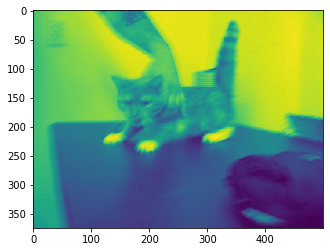

In [4]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = img_array / 255 
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # 
    break  #...and one more!

In [5]:
print(img_array)

[[0.65490196 0.65490196 0.65882353 ... 0.8        0.79607843 0.79215686]
 [0.65490196 0.65490196 0.65882353 ... 0.8        0.79607843 0.79607843]
 [0.65490196 0.65490196 0.65882353 ... 0.80392157 0.8        0.79607843]
 ...
 [0.48627451 0.48627451 0.48627451 ... 0.00784314 0.00784314 0.00784314]
 [0.48235294 0.48235294 0.48235294 ... 0.00392157 0.00392157 0.00392157]
 [0.47843137 0.47843137 0.48235294 ... 0.00392157 0.00392157 0.00392157]]


In [6]:
print(img_array.shape)

(375, 500)


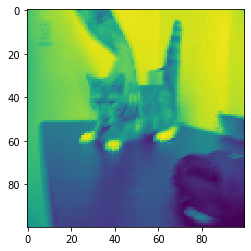

In [7]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [8]:
print(new_array.shape)

(100, 100)


In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:35<00:00, 113.69it/s]


24946


In [10]:
import random
random.shuffle(training_data)
print(training_data[:2])

[[array([[244, 244, 244, ..., 240, 239, 236],
       [244, 244, 244, ..., 238, 239, 240],
       [244, 244, 246, ..., 239, 240, 239],
       ...,
       [246, 247, 244, ..., 230, 235, 238],
       [245, 244, 243, ..., 222, 223, 235],
       [242, 242, 242, ..., 223, 233, 230]], dtype=uint8), 0], [array([[166, 170, 162, ..., 185, 186,  87],
       [160, 159, 160, ..., 184, 187,  81],
       [157, 163, 160, ..., 188, 183,  78],
       ...,
       [157, 142, 131, ..., 218, 218, 219],
       [166, 155, 130, ..., 227, 225, 231],
       [155, 159, 138, ..., 233, 232, 235]], dtype=uint8), 0]]


In [11]:
x = []
y = []

In [12]:
for features, lable in training_data:
    x.append(features)
    y.append(lable)

In [13]:
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1 )
y = np.array(y)

In [14]:
import pickle

### we save the data in pickle file for easy access

In [15]:
pickle_out = open('x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

In [16]:
pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open('x.pickle', 'rb')
x = pickle.load(pickle_in)
len(x)

24946